In [1]:
# Εγκατάσταση των απαραίτητων βιβλιοθηκών
# %pip install pandas numpy scikit-learn matplotlib seaborn

In [11]:
# Φόρτωση των βιβλιοθηκών
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Φόρτωση δεδομένων

url = "https://raw.githubusercontent.com/kdemertzis/EKPA/refs/heads/main/Data/DarkNet.csv"
df = pd.read_csv(url)


C:\Users\asiganos.ODYSSEY\AppData\Local\Temp\ipykernel_33988\2385842549.py:6: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [4]:
# Προεπεξεργασία

# Προσαρμογή στήλης Label-1
le = LabelEncoder()
df['Label-1'] = le.fit_transform(df['Label-1'])  # Non-Tor=0, Tor=1, NonVPN=2, VPN=3
df['Label-1'] = df['Label-1'].apply(lambda x: 1 if x == 1 else 0) # Tor=1, Other=0

# Διαχωρισμός X, y
X = df.drop(['Src_IP', 'Dst_IP', 'Label-1', 'Label-2'], axis=1)
y = df['Label-1']

# Αφαίρεση γραμμών που δεν περιέχουν αριθμητικά δεδομένα (infinity κλπ.)
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()
y = y.loc[X.index]


In [5]:
# Διαχωρισμός Train / Test

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [6]:
# Εκπαίδευση μοντέλου Random Forest

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
# Προβλέψεις

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

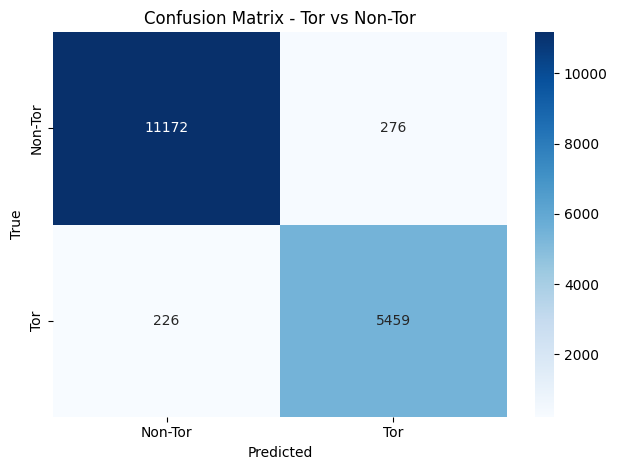

In [8]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Non-Tor", "Tor"],
    yticklabels=["Non-Tor", "Tor"]
)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Tor vs Non-Tor")
plt.tight_layout()
plt.show()

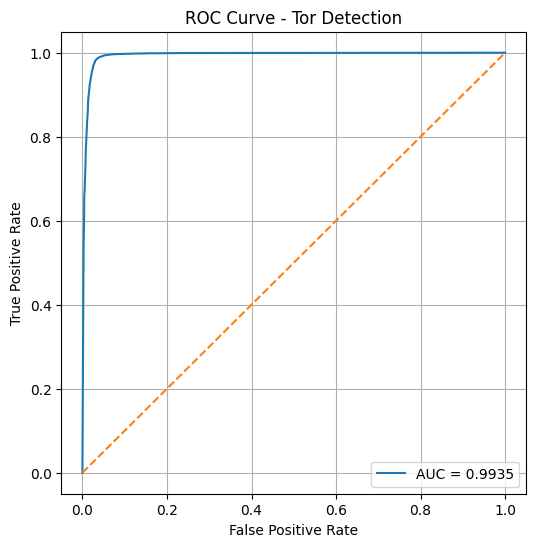

In [9]:
# ROC Curve & AUC


fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tor Detection")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Classification Report

print(classification_report(y_test, y_pred, target_names=["Non-Tor", "Tor"]))

              precision    recall  f1-score   support

     Non-Tor       0.98      0.98      0.98     11448
         Tor       0.95      0.96      0.96      5685

    accuracy                           0.97     17133
   macro avg       0.97      0.97      0.97     17133
weighted avg       0.97      0.97      0.97     17133

